In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss,Sigmoid,BCELoss, Sequential,Module, Softmax,CrossEntropyLoss,ReLU
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.fashion_mnist import load_data


In [3]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
(x_train,y_train),(x_test,y_test) = load_data()

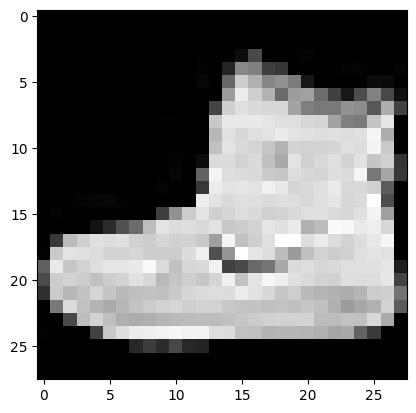

In [5]:
plt.imshow(x_train[0], cmap='gray')
plt.show() 

In [6]:
y_train[0]

9

1. 정규화
2. 딥러닝으로 학습(Sequential )
3. x_test 의 0 이미지의 예측값
4. x_train 정확도 x_test 의 정확도,f1_score, confusion_matrix

#### 1. 정규화

In [8]:
# /255로 정규화 진행
x = torch.FloatTensor( x_train.reshape( 60000, 28*28)/255 )
y = torch.LongTensor( y_train)
x_t = torch.FloatTensor( x_test.reshape( 10000, 28*28)/255 )
y_t = torch.LongTensor( y_test)

#### 2. 딥러닝으로 학습

In [9]:
# 딥러닝 학습 진행
model = Sequential()
model.add_module( 'nn1', Linear(784, 64))
model.add_module( 'relu1', ReLU() )
model.add_module( 'nn2', Linear(64, 32))
model.add_module( 'relu2', ReLU() )
model.add_module( 'nn3', Linear(32, 10))
model.add_module( 'soft', Softmax(dim=1) )
loss_fn = CrossEntropyLoss()
optimizer = Adam( model.parameters(), lr=0.01 )
for epoch in range( 200):
    optimizer.zero_grad()
    hx = model( x ) #model.forward(x)
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print('-----------------')
    _ , idx = hx.max( dim=1)
    pred = idx.numpy()
    print('epoch',epoch,'cost', cost.item(), 
          '정확도', accuracy_score( y.numpy(), pred ))

-----------------
epoch 0 cost 2.303239107131958 정확도 0.1
-----------------
epoch 1 cost 2.2896556854248047 정확도 0.10048333333333333
-----------------
epoch 2 cost 2.269000768661499 정확도 0.11858333333333333
-----------------
epoch 3 cost 2.228645086288452 정확도 0.2986666666666667
-----------------
epoch 4 cost 2.181046724319458 정확도 0.3307333333333333
-----------------
epoch 5 cost 2.132141590118408 정확도 0.32888333333333336
-----------------
epoch 6 cost 2.084351062774658 정확도 0.36815
-----------------
epoch 7 cost 2.0465495586395264 정확도 0.4885333333333333
-----------------
epoch 8 cost 2.0287559032440186 정확도 0.46076666666666666
-----------------
epoch 9 cost 2.003532886505127 정확도 0.4917
-----------------
epoch 10 cost 1.9772230386734009 정확도 0.5058666666666667
-----------------
epoch 11 cost 1.932280421257019 정확도 0.5557
-----------------
epoch 12 cost 1.9247819185256958 정확도 0.5564333333333333
-----------------
epoch 13 cost 1.8947272300720215 정확도 0.6011333333333333
-----------------
epoch 14 c

#### 3. x_test의 0 이미지의 예측값

In [29]:
pred = model( x_t[0].view(1,-1) )
_, idx = pred.max(dim=1)
print('예측결과',idx.item()==y_train[0],'\nx_test의 예측값:',idx.item(), '실제값: ', y_test[0])

예측결과 True 
x_test의 예측값: 9 실제값:  9


In [ ]:
# x_test의 0 이미지의 예측값
pred= model(torch.FloatTensor(x_test[0].reshape(1, 28*28)))
_, idx = pred.max(dim=1)

print('예측결과',idx.item()==y_train[0],'\nx_test의 예측값:',idx.item(), '실제값: ', y_train[0])

예측결과 True 
x_test의 예측값: 9 실제값:  9


#### 4. x_train 정확도 x_test 의 정확도,f1_score, confusion_matrix

In [30]:
# x_train 정확도 x_test 의 정확도,f1_score, confusion_matrix
x_train_hx = model(x)
_, x_train_idx = x_train_hx.max(dim=1)
x_train_pred = x_train_idx.numpy()

print('x_train 정확도: ',accuracy_score(y.numpy(), x_train_pred))


x_test_hx = model(x_t)
_, x_test_idx = x_test_hx.max(dim=1)
x_test_pred = x_test_idx.numpy()

print('x_test 정확도: ',accuracy_score(y_t.numpy(), x_test_pred))

print('f1_score: ', f1_score(y_t.numpy(), x_test_pred, average='macro'))
print('confusion_matrix: \n',confusion_matrix(y_t.numpy(), x_test_pred))

x_train 정확도:  0.8390166666666666
x_test 정확도:  0.821
f1_score:  0.7839604669325768
confusion_matrix: 
 [[920   1  18  35   5   1   0   0  20   0]
 [  7 953   7  23   8   0   0   0   2   0]
 [ 31   1 825  12 124   1   0   0   6   0]
 [ 56  13  19 874  33   0   0   0   5   0]
 [  3   1 129  35 826   0   0   0   6   0]
 [  0   0   0   1   0 950   0  38   2   9]
 [327   2 254  38 356   0   0   0  23   0]
 [  0   0   0   0   0  26   0 954   0  20]
 [  8   1  10   7   5   2   0   6 961   0]
 [  0   0   0   0   0  11   0  41   1 947]]


https://matplotlib.org/stable/users/explain/colors/colormaps.html

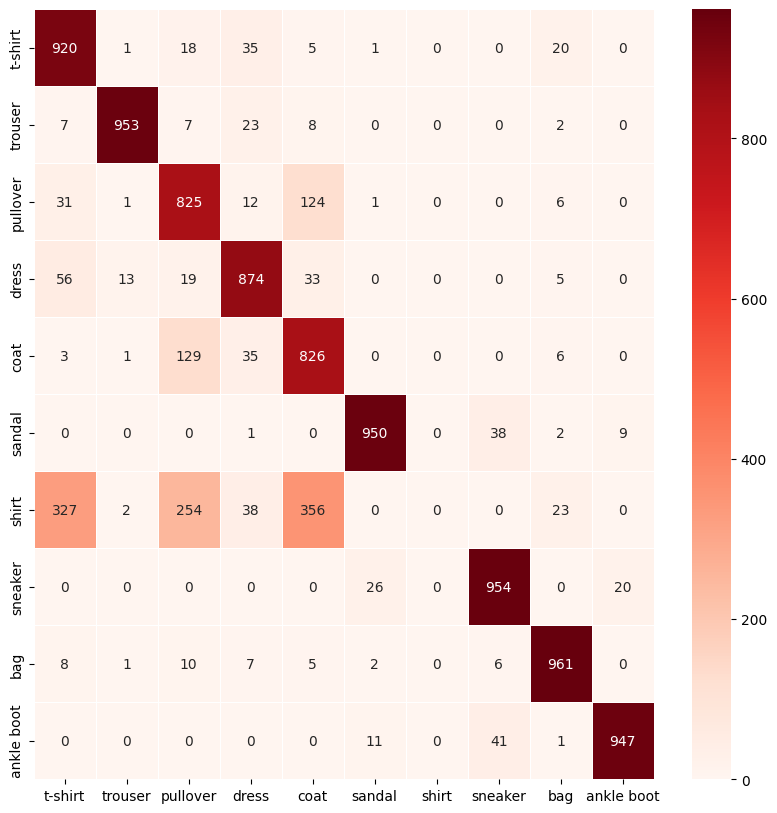

In [39]:
import seaborn as sb
c = confusion_matrix(y_t.numpy(), x_test_pred)
plt.figure( figsize=(10,10))
sb.heatmap( c ,cmap='Reds', annot=True,
        fmt='d', linewidths=0.4,
        xticklabels=text_labels,
        yticklabels=text_labels)
plt.show()